In [1]:
pwd

'/home/udit/Desktop/Data_MIR_students/PhD/Divya/divya_data/SSDP_MME_MICE_for_different_cases_final'

In [3]:
import xarray as xr
import numpy as np
import random
import numpy as np
import pandas as pd
from random import randrange
import matplotlib.pyplot as plt
import os
import seaborn as sns
#import cartopy.crs as ccrs
import statistics
from matplotlib import gridspec
import glob
from scipy.stats import iqr
green_diamond = dict(markerfacecolor='g', marker='D')
c0 = "red"
import pickle
%matplotlib inline
def boxplot_data_streamflow_avg (streamflow_hist_narmada_1,streamflow_near_narmada_1,streamflow_mid_narmada_1,streamflow_far_narmada_1,):
    data_historical = []
    data_near = []
    data_mid = []
    data_far = []
    for i in range(1,13):
        mean_1 = []
        for k in range(len(ICs)):
            mean_1_1 = streamflow_hist_narmada_1['streamflow'].sel(month = i).sel(initial_condition = ICs[k].values).mean()
            mean_1.append(mean_1_1)
        a = mean_1
        data_historical.append(a)
        mean_1 = []
        for k in range(len(ICs)):
            mean_1_1 = streamflow_near_narmada_1['streamflow'].sel(month = i).sel(initial_condition = ICs[k].values).mean()
            mean_1.append(mean_1_1)
        a = mean_1
        data_near.append(a)
        mean_1 = []
        for k in range(len(ICs)):
            mean_1_1 = streamflow_mid_narmada_1['streamflow'].sel(month = i).sel(initial_condition = ICs[k].values).mean()
            mean_1.append(mean_1_1)
        a = mean_1
        data_mid.append(a)
        mean_1 = []
        for k in range(len(ICs)):
            mean_1_1 = streamflow_far_narmada_1['streamflow'].sel(month = i).sel(initial_condition = ICs[k].values).mean()
            mean_1.append(mean_1_1)
        a = mean_1
        data_far.append(a)
    data = [data_historical,data_near, data_mid,data_far]
    return data



## calculation for Narmada - non-bias corrected data 
## input = streamflow (routing at dam location)
## output = transition probability from one scenario (i) at time t to another scenario (j) at time t+1

In [13]:
# streamflow_MME_ssp245 = xr.open_dataset('streamflow_full_montlhy_term_all_initial_condition_narmada_MME_ssp245.nc')
# streamflow_MICE_ssp245 = xr.open_dataset('streamflow_full_montlhy_term_all_initial_condition_narmada_MICE_ssp245.nc')
streamflow_MME_ssp585 = xr.open_dataset('streamflow_full_term_all_initial_condition_narmada_MME_ssp585.nc')
streamflow_MICE_ssp585 = xr.open_dataset('streamflow_full_term_all_initial_condition_narmada_MICE_ssp585.nc')
initial_condition_list_new_MME = ['ACCESS-CM2', 'GFDL-ESM4', 'CanESM5', 'MRI-ESM2-0', 'EC-EARTH3', 'NorESM2-LM']
initial_condition_list_new_MICE = streamflow_MICE_ssp585['initial_condition'].values
initial_condition_list_new_MICE

array(['r101i1p1f1', 'r102i1p1f1', 'r103i1p1f1', 'r104i1p1f1',
       'r105i1p1f1', 'r106i1p1f1', 'r107i1p1f1', 'r108i1p1f1',
       'r109i1p1f1', 'r110i1p1f1', 'r111i1p1f1', 'r112i1p1f1',
       'r113i1p1f1', 'r114i1p1f1', 'r115i1p1f1', 'r116i1p1f1',
       'r117i1p1f1', 'r118i1p1f1', 'r120i1p1f1', 'r121i1p1f1',
       'r122i1p1f1', 'r123i1p1f1', 'r124i1p1f1', 'r125i1p1f1',
       'r126i1p1f1', 'r127i1p1f1', 'r128i1p1f1', 'r129i1p1f1',
       'r130i1p1f1', 'r131i1p1f1', 'r132i1p1f1', 'r133i1p1f1',
       'r134i1p1f1', 'r135i1p1f1', 'r136i1p1f1', 'r137i1p1f1',
       'r138i1p1f1', 'r139i1p1f1', 'r140i1p1f1', 'r142i1p1f1',
       'r143i1p1f1', 'r144i1p1f1', 'r145i1p1f1', 'r146i1p1f1',
       'r147i1p1f1', 'r148i1p1f1', 'r149i1p1f1', 'r150i1p1f1', 'r1i1p1f1'],
      dtype=object)

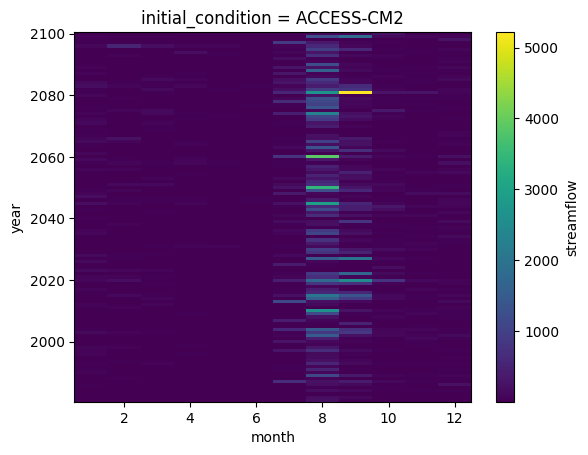

In [5]:
streamflow_MME_ssp245 = xr.open_dataset('streamflow_full_montlhy_term_all_initial_condition_narmada_MME_ssp245.nc')
streamflow_MME_ssp585 = xr.open_dataset('streamflow_full_term_all_initial_condition_narmada_MME_ssp585.nc')
streamflow_MME_ssp245['streamflow'].sel(initial_condition = 'ACCESS-CM2').plot()


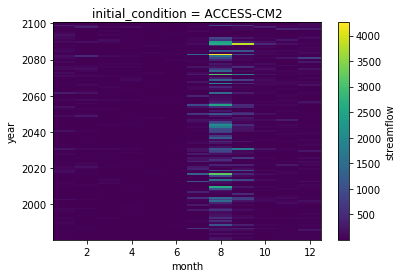

In [5]:
streamflow_MME_ssp585['streamflow'].sel(initial_condition = 'ACCESS-CM2').plot()

In [6]:
def classes_assign (D_ph_1, percentiles_Dph,k):
    if D_ph_1<= percentiles_Dph[k][0]:
        classes_1 = 1
    elif D_ph_1> percentiles_Dph[k][0] and D_ph_1<= percentiles_Dph[k][1]:
        classes_1 = 2
                   # print(classes)
    elif D_ph_1> percentiles_Dph[k][1] and D_ph_1<= percentiles_Dph[k][2]:
        classes_1 = 3                    
    elif D_ph_1> percentiles_Dph[k][2]:
        classes_1 = 4
    return classes_1

def percentiles_Dph(yearly_MME_ssp245, cum_anomalies_final):
    no_year = len(yearly_MME_ssp245['year'])
    percentiles_Dph = np.zeros((no_year,3))
    years = yearly_MME_ssp245['year']
    years_from2010 = years[30:121]
    for i,years_1 in enumerate(years):
        percentiles_Dph[i][0] = np.percentile(cum_anomalies_final['cumulative_anomalies'].sel(year = years_1),25)
        percentiles_Dph[i][1] = np.percentile(cum_anomalies_final['cumulative_anomalies'].sel(year = years_1),50)
        percentiles_Dph[i][2] = np.percentile(cum_anomalies_final['cumulative_anomalies'].sel(year = years_1),75)
    #len(percentiles_Dph) 
    return percentiles_Dph

def convert_nc_TP(years, cum_anomalies_final,transition_probability_IC,percentiles_Dph):
    Final_TP = pd.DataFrame({'year':[],'initial_i':[],'initial_j':[],'TP_1':[],'TP_2':[],'TP_final':[]})
    initial_condition = cum_anomalies_final['initial_condition']
    #years_from2010 = years[30:120]
    years_from2010 = years[0:120]
    for k,years_1 in enumerate(years_from2010):
    #for k,years_1 in enumerate(years):
        for i, condition1 in enumerate(initial_condition):
            for j, condition2 in enumerate(initial_condition):
                D_ph_1 = cum_anomalies_final['cumulative_anomalies'].sel(year = years_1,initial_condition = initial_condition.values[i])
                classes_1 = classes_assign (D_ph_1, percentiles_Dph,k)                           
                D_ph_2 = cum_anomalies_final['cumulative_anomalies'].sel(year = years_1+1,initial_condition = initial_condition.values[j])
                classes_2 = classes_assign (D_ph_2, percentiles_Dph,k)            
                #print(classes_1)
                #print(classes_2)
                #print(k)
                TP_1 = transition_probability_IC[k][classes_1-1][classes_2-1]
                #print(TP_1)
                temp1 = []
                for l, condition3 in enumerate(initial_condition):
                    D_ph_3 = cum_anomalies_final['cumulative_anomalies'].sel(year = years_1+1,initial_condition = initial_condition.values[l])
                    classes_3 = classes_assign (D_ph_3, percentiles_Dph,k)            
                    TP_2_1 = transition_probability_IC[k][classes_1-1][classes_3-1]
                    temp1.append(TP_2_1)
                TP_2 = np.nansum(temp1)
                if TP_2 == 0:
                    #print(1)
                    TP_final = 0
                else:
                    TP_final = TP_1/TP_2
                Final_TP = Final_TP.append({'year':years_1.values,'initial_i':condition1.values,'initial_j':condition2.values,'TP_1':TP_1,'TP_2':TP_2,'TP_final':TP_final},ignore_index=True)
    Final_TP.to_csv('final_TP.csv')
    final_tp = pd.read_csv('final_TP.csv')
    final_tp1 = final_tp.iloc[:,1:]
    final_tp1 = final_tp1.set_index(['year', 'initial_i','initial_j'])
    Final_TP_1 = final_tp1.to_xarray()
    return Final_TP_1


In [7]:
yearly_MME_ssp245 = xr.open_dataset('streamflow_full_annual_term_all_initial_condition_narmada_with6models_MME_ssp245.nc')
yearly_MME_ssp585 = xr.open_dataset('streamflow_full_annual_term_all_initial_condition_narmada_with6models_MME_ssp585.nc')
print(yearly_MME_ssp245['streamflow'].sel(initial_condition = 'ACCESS-CM2', year = 2010 ).values)
yearly_MME_ssp585['streamflow'].sel(initial_condition = 'ACCESS-CM2', year = 2010 )

3014.2298002051025


<xarray.DataArray 'streamflow' ()>
array(3014.2298)
Coordinates:
    initial_condition  <U10 'ACCESS-CM2'
    year               float64 2.01e+03

In [14]:
# # for MME_ssp245
yearly_MME_ssp245 = xr.open_dataset('streamflow_full_annual_term_all_initial_condition_narmada_with6models_MME_ssp245.nc')
# years = yearly_MME_ssp245['year']
# cum_anomalies_final_MME_ssp245 = xr.open_dataset('cumulative_anomalies_narmada_with6models_MME_SSP245.nc')
# percentiles_Dph_MME_ssp245 = percentiles_Dph(yearly_MME_ssp245, cum_anomalies_final_MME_ssp245)
# with open("transition_probability_IC_with6models_MME_SSP245", "rb") as fp:   # Unpickling
#     transition_probability_IC = pickle.load(fp) 
# transition_probability_IC
# #transition_probability_IC = transition_probability_IC_with6models_MME_SSP245
# Final_TP_MME_ssp245 = convert_nc_TP(years, cum_anomalies_final_MME_ssp245,transition_probability_IC,percentiles_Dph_MME_ssp245)
# Final_TP_MME_ssp245.to_netcdf('SSDP_transition_probability_nonBC_with6models_MME_SSP245.nc')

# # for MICE_ssp245
# yearly_MICE_ssp245 = xr.open_dataset('streamflow_full_annual_term_all_initial_condition_narmada_with6models_MICE_SSP245.nc')
# years = yearly_MICE_ssp245['year']
# cum_anomalies_final_MICE_ssp245 = xr.open_dataset('cumulative_anomalies_narmada_with6models_MICE_SSP245.nc')
# percentiles_Dph_MICE_ssp245 = percentiles_Dph(yearly_MICE_ssp245, cum_anomalies_final_MICE_ssp245)
# with open("transition_probability_IC_with6models_MICE_SSP245", "rb") as fp:   # Unpickling
#     transition_probability_IC = pickle.load(fp) 
# transition_probability_IC
# # #transition_probability_IC = transition_probability_IC_with6models_MME_SSP245
# Final_TP_MICE_ssp245 = convert_nc_TP(years, cum_anomalies_final_MICE_ssp245,transition_probability_IC,percentiles_Dph_MICE_ssp245)
# Final_TP_MICE_ssp245.to_netcdf('SSDP_transition_probability_nonBC_with6models_MICE_SSP245.nc')

# # # for MME_ssp585
yearly_MME_ssp585 = xr.open_dataset('streamflow_full_annual_term_all_initial_condition_narmada_with6models_MME_ssp585.nc')
years = yearly_MME_ssp585['year']
cum_anomalies_final_MME_ssp585 = xr.open_dataset('cumulative_anomalies_narmada_with6models_MME_SSP585.nc')
percentiles_Dph_MME_ssp585 = percentiles_Dph(yearly_MME_ssp585, cum_anomalies_final_MME_ssp585)
with open("transition_probability_IC_with6models_MME_SSP585", "rb") as fp:   # Unpickling
    transition_probability_IC = pickle.load(fp) 
transition_probability_IC
#transition_probability_IC = transition_probability_IC_with6models_MME_SSP585
Final_TP_MME_ssp585 = convert_nc_TP(years, cum_anomalies_final_MME_ssp585,transition_probability_IC,percentiles_Dph_MME_ssp585)
Final_TP_MME_ssp585.to_netcdf('SSDP_transition_probability_nonBC_with6models_MME_SSP585.nc')

# for MICE_ssp585
# yearly_MICE_ssp585 = xr.open_dataset('streamflow_full_annual_term_all_initial_condition_narmada_with6models_MICE_ssp585.nc')
# years = yearly_MICE_ssp585['year']
# cum_anomalies_final_MICE_ssp585 = xr.open_dataset('cumulative_anomalies_narmada_with6models_MICE_SSP585.nc')
# percentiles_Dph_MICE_ssp585 = percentiles_Dph(yearly_MICE_ssp585, cum_anomalies_final_MICE_ssp585)
# with open("transition_probability_IC_with6models_MICE_SSP585", "rb") as fp:   # Unpickling
#     transition_probability_IC = pickle.load(fp) 
# transition_probability_IC
# # #transition_probability_IC = transition_probability_IC_with6models_MME_SSP585
# Final_TP_MICE_ssp585 = convert_nc_TP(years, cum_anomalies_final_MICE_ssp585,transition_probability_IC,percentiles_Dph_MICE_ssp585)
# Final_TP_MICE_ssp585.to_netcdf('SSDP_transition_probability_nonBC_with6models_MICE_SSP585.nc')

